In [1]:
#Important necessary Lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import e-commerce dataset
df = pd.read_excel('C:/Users/ARNAV/Downloads/E-com_Data.XLSX')

In [3]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,NaN,14256,406556,2017-12-19,2,10:03:00,355.0,710.0,Location 11,NaN,NaN,NaN
1,276.0,15052,406651,2017-12-19,12,12:50:00,208.0,2496.0,Location 14,NaN,NaN,NaN
2,3986.0,14622,406578,2017-12-19,13,11:20:00,181.0,2353.0,Location 15,NaN,NaN,NaN
3,3855.0,15742,406643,2017-12-19,12,12:19:00,254.0,3048.0,Location 15,NaN,NaN,NaN
4,NaN,15742,406556,2017-12-19,3,10:03:00,564.0,1692.0,Location 15,NaN,NaN,NaN


In [4]:
df.shape

(537979, 12)

In [54]:
df.

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [5]:
#Customer distribution by Shipping Location
country_cust_data=df[['Shipping Location','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Shipping Location'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Shipping Location,CustomerID
15,Location 36,4347
10,Location 26,1886
3,Location 14,1712
4,Location 15,1500
0,Location 1,1032
2,Location 11,976
16,Location 37,473
9,Location 25,368
6,Location 21,341
5,Location 20,252


In [6]:
#Check for missing values in the dataset
df.isnull().sum(axis=0)

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [7]:
#Remove missing values from CustomerID column, can ignore missing values in description column
df = df[pd.notnull(df['CustomerID'])]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 1 to 537949
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          404189 non-null  object        
 2   InvoieNo           404189 non-null  int64         
 3   Date of purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price per Unit     404189 non-null  float64       
 7   Price              404189 non-null  float64       
 8   Shipping Location  404189 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 40.1+ MB


In [9]:
df.Quantity.unique()

array([  12,   13,   48,    1,    3,   10,    8,   24,    4,    6,  120,
         18,   36,    2,   25,  100,  144,   -1,   96,    5,   14,   20,
         32,   30,   19,   16,   31,   60,   -2,   50,   40,  -10,   -5,
         72,  -24,   42,  126,   -4,   15,   84,   -3,  -12,   64,   17,
         -6,   66,   80,    7,   54,  -36,  288,   75,  128,    9,  150,
        240,   38,  108,   22,   58,  192,  200,  204,  180, 1440,  -20,
         11,  -14,  -11,  -15,   23,  324,   39,  216,   33,   21,   59,
        -25,  -17,  408,  432,   53,  160,   35,  186,  256,  250,  -48,
        -16,  480,   76,  388,  -38,   34,   28,  168,   -9,  360,   89,
         27,   41,   -7, 1000,  576,   -8,   26,  140,  -18,  -72,  -42,
        384,   29,  300,   56,   49,  -32,  -31,   78,   90,   45,   85,
         88,  864,  252,   62,   95,  115,  400,   44,  224,   43,  -23,
        139, -120,   63,   46,   70,  152,  500,  -40, -108,  600,   47,
         52,  312,  156,   57,  110,  320,  -35,  4

In [10]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [11]:
df=df.drop(columns=['Cancelled_status','Reason of return','Sold as set'],axis=1)

In [12]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
1,276.0,15052,406651,2017-12-19,12,12:50:00,208.0,2496.0,Location 14
2,3986.0,14622,406578,2017-12-19,13,11:20:00,181.0,2353.0,Location 15
3,3855.0,15742,406643,2017-12-19,12,12:19:00,254.0,3048.0,Location 15
6,72.0,15588,406540,2017-12-19,48,08:48:00,240.0,11520.0,Location 25
7,1552.0,14518,406602,2017-12-19,1,11:34:00,73.0,73.0,Location 26


In [13]:
df.isnull().sum(axis=0)

CustomerID           0
Item Code            0
InvoieNo             0
Date of purchase     0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

In [14]:
#Filter out records with negative values
df = df[(df['Quantity']>0)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396006 entries, 1 to 537949
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         396006 non-null  float64       
 1   Item Code          396006 non-null  object        
 2   InvoieNo           396006 non-null  int64         
 3   Date of purchase   396006 non-null  datetime64[ns]
 4   Quantity           396006 non-null  int64         
 5   Time               396006 non-null  object        
 6   price per Unit     396006 non-null  float64       
 7   Price              396006 non-null  float64       
 8   Shipping Location  396006 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.2+ MB


In [16]:
df.Time.unique()

array([datetime.time(12, 50), datetime.time(11, 20),
       datetime.time(12, 19), datetime.time(8, 48), datetime.time(11, 34),
       datetime.time(17, 48), datetime.time(9, 7), datetime.time(8, 59),
       datetime.time(9, 38), datetime.time(11, 56), datetime.time(10, 20),
       datetime.time(10, 51), datetime.time(9, 44), datetime.time(12, 0),
       datetime.time(11, 26), datetime.time(12, 23),
       datetime.time(12, 49), datetime.time(8, 39), datetime.time(10, 46),
       datetime.time(12, 20), datetime.time(12, 16), datetime.time(11, 8),
       datetime.time(18, 8), datetime.time(11, 59), datetime.time(12, 9),
       datetime.time(10, 13), datetime.time(12, 35),
       datetime.time(11, 35), datetime.time(15, 50), datetime.time(18, 9),
       datetime.time(19, 18), datetime.time(11, 11),
       datetime.time(13, 21), datetime.time(15, 54),
       datetime.time(15, 13), datetime.time(12, 7), datetime.time(14, 51),
       datetime.time(13, 26), datetime.time(14, 40),
       date

In [17]:
#Add new column depicting total amount
df['TotalAmount'] = df['Quantity'] * df['price per Unit']

In [18]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,TotalAmount
1,276.0,15052,406651,2017-12-19,12,12:50:00,208.0,2496.0,Location 14,2496.0
2,3986.0,14622,406578,2017-12-19,13,11:20:00,181.0,2353.0,Location 15,2353.0
3,3855.0,15742,406643,2017-12-19,12,12:19:00,254.0,3048.0,Location 15,3048.0
6,72.0,15588,406540,2017-12-19,48,08:48:00,240.0,11520.0,Location 25,11520.0
7,1552.0,14518,406602,2017-12-19,1,11:34:00,73.0,73.0,Location 26,73.0


In [19]:
df.shape

(396006, 10)

In [20]:
revenue_contributed = df.groupby('CustomerID')['TotalAmount'].sum()
revenue_contributed = revenue_contributed.reset_index()
revenue_contributed.head()

,CustomerID,TotalAmount
0,2.0,553704.0
1,3.0,257404.0
2,4.0,176613.0
3,5.0,41976.0
4,6.0,166972.0


In [21]:
frequency = df.groupby('CustomerID')['InvoieNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoieNo
0,2.0,182
1,3.0,27
2,4.0,72
3,5.0,16
4,6.0,77


In [22]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'], format='%d-%m-%Y %H:%M')
df['duration'] = df['Date of purchase'].max() - df['Date of purchase']
df['duration']

1          0 days
2          0 days
3          0 days
6          0 days
7          0 days
           ...   
537914   352 days
537915   352 days
537947   363 days
537948   363 days
537949   367 days
Name: duration, Length: 396006, dtype: timedelta64[ns]

In [23]:
recency = df.groupby('CustomerID')['duration'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,duration
0,2.0,3 days
1,3.0,76 days
2,4.0,18 days
3,5.0,310 days
4,6.0,36 days


In [24]:
#merging data
rf = pd.merge(revenue_contributed, frequency, on='CustomerID', how='inner')
rfm = pd.merge(rf, recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'TotalAmount', 'frequency', 'recency']
rfm['recency'] = rfm['recency'].dt.days
rfm.head()

,CustomerID,TotalAmount,frequency,recency
0,2.0,553704.0,182,3
1,3.0,257404.0,27,76
2,4.0,176613.0,72,18
3,5.0,41976.0,16,310
4,6.0,166972.0,77,36


In [25]:
#Outlier treatment

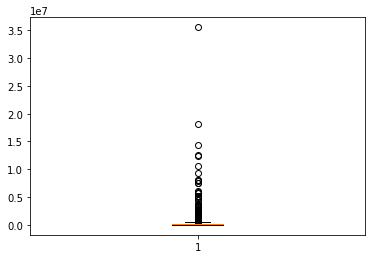

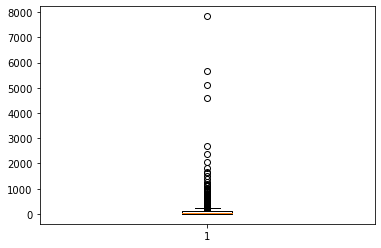

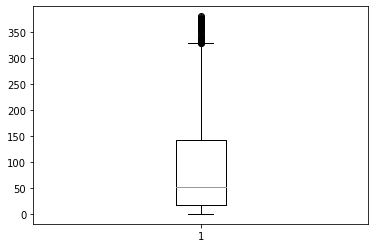

In [26]:
plt.boxplot(rfm['TotalAmount'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['recency'])
plt.show()

#Descriptive Statistics (Recency)
rfm.recency.describe()

C:\Users\ARNAV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


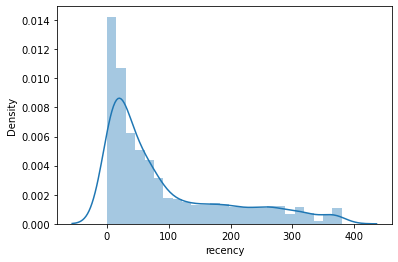

In [27]:
#Recency distribution plot
import seaborn as sns
x = rfm['recency']

ax = sns.distplot(x)

In [28]:
#Descriptive Statistics (Frequency)
rfm.frequency.describe()

count    4324.000000
mean       91.583256
std       228.626074
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7838.000000
Name: frequency, dtype: float64

C:\Users\ARNAV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


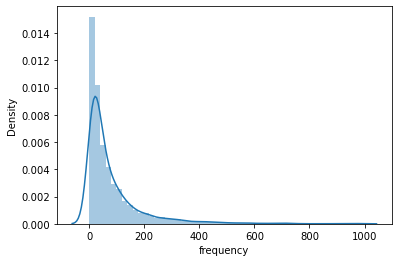

In [29]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm.query('frequency < 1000')['frequency']

ax = sns.distplot(x)

In [30]:
#Descriptive Statistics (Monetary)
rfm.TotalAmount.describe()

count    4.324000e+03
mean     2.339858e+05
std      8.636671e+05
min      3.880000e+02
25%      3.928800e+04
50%      8.614700e+04
75%      2.108338e+05
max      3.553619e+07
Name: TotalAmount, dtype: float64

C:\Users\ARNAV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


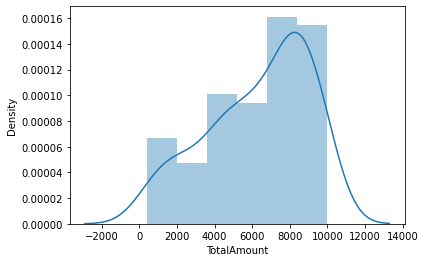

In [31]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm.query('TotalAmount < 10000')['TotalAmount']

ax = sns.distplot(x)

In [32]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [33]:
quantiles

{'CustomerID': {0.25: 1092.75, 0.5: 2182.5, 0.75: 3279.25},
 'TotalAmount': {0.25: 39288.0, 0.5: 86147.0, 0.75: 210833.75},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.25}}

In [34]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [35]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm['R'] = rfm['recency'].apply(RScoring, args=('recency',quantiles,))
rfm['F'] = rfm['frequency'].apply(FnMScoring, args=('frequency',quantiles,))
rfm['M'] = rfm['TotalAmount'].apply(FnMScoring, args=('TotalAmount',quantiles,))
rfm.head()

,CustomerID,TotalAmount,frequency,recency,R,F,M
0,2.0,553704.0,182,3,1,1,1
1,3.0,257404.0,27,76,3,3,1
2,4.0,176613.0,72,18,1,2,2
3,5.0,41976.0,16,310,4,4,3
4,6.0,166972.0,77,36,2,2,2


In [36]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,CustomerID,TotalAmount,frequency,recency,R,F,M,RFMGroup,RFMScore
0,2.0,553704.0,182,3,1,1,1,111,3
1,3.0,257404.0,27,76,3,3,1,331,7
2,4.0,176613.0,72,18,1,2,2,122,5
3,5.0,41976.0,16,310,4,4,3,443,11
4,6.0,166972.0,77,36,2,2,2,222,6


In [37]:
import os
os.getcwd()

'C:\\Users\\ARNAV'

In [38]:
rfm.to_excel('C:/Users/ARNAV/rfm.xls')

In [39]:
rfm.shape

(4324, 9)

In [40]:
df.shape

(396006, 11)

In [ ]:
#K-Means Clustering 

In [42]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm['recency'] = [handle_neg_n_zero(x) for x in rfm.recency]
rfm['TotalAmount'] = [handle_neg_n_zero(x) for x in rfm.TotalAmount]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm[['recency', 'frequency', 'TotalAmount']].apply(np.log, axis = 1).round(3)

C:\Users\ARNAV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


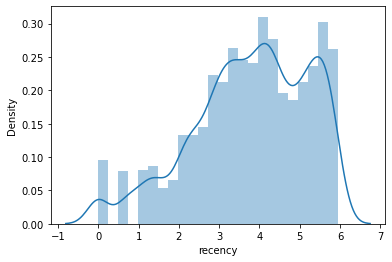

In [43]:
#Data distribution after data normalization for Recency
recency_Plot = Log_Tfd_Data['recency']
ax = sns.distplot(recency_Plot)


C:\Users\ARNAV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


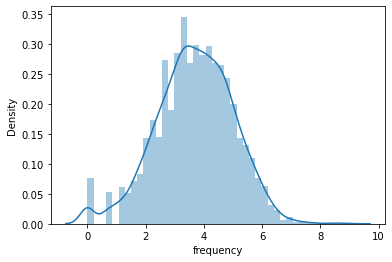

In [44]:
#Data distribution after data normalization for Frequency
frequency_Plot = Log_Tfd_Data.query('frequency < 1000')['frequency']
ax = sns.distplot(frequency_Plot)

C:\Users\ARNAV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


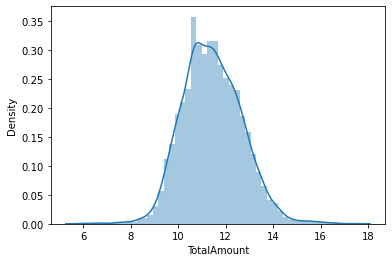

In [45]:
#Data distribution after data normalization for Monetary
TotalAmount_Plot = Log_Tfd_Data.query('TotalAmount < 10000')['TotalAmount']
ax = sns.distplot(TotalAmount_Plot)

In [46]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm.index, columns = Log_Tfd_Data.columns)

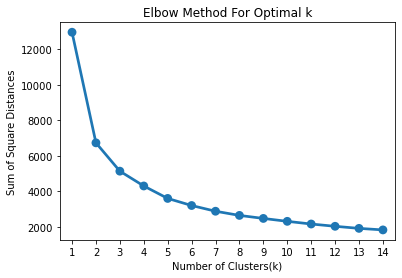

In [47]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [50]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head()

,CustomerID,TotalAmount,frequency,recency,R,F,M,RFMGroup,RFMScore,Cluster
0,2.0,553704.0,182,3,1,1,1,111,3,2
1,3.0,257404.0,27,76,3,3,1,331,7,0
2,4.0,176613.0,72,18,1,2,2,122,5,0
3,5.0,41976.0,16,310,4,4,3,443,11,1
4,6.0,166972.0,77,36,2,2,2,222,6,0


<Figure size 504x504 with 0 Axes>

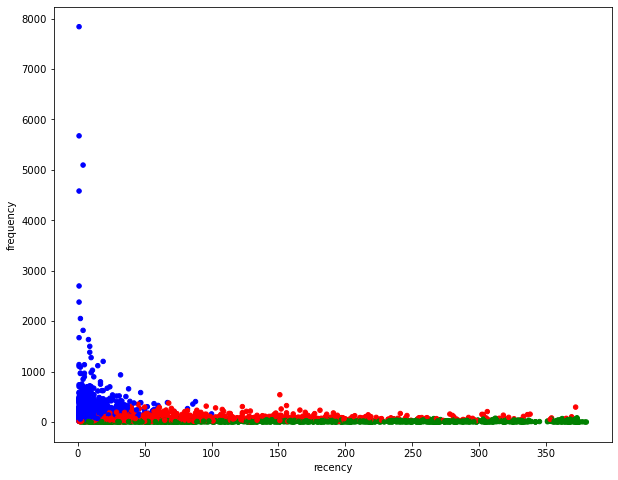

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
rfm['Color'] = rfm['Cluster'].map(lambda p: Colors[p])
ax = rfm.plot(    
    kind="scatter", 
    x="recency", y="frequency",
    figsize=(10,8),
    c = rfm['Color']
)

In [52]:
rfm.head()

,CustomerID,TotalAmount,frequency,recency,R,F,M,RFMGroup,RFMScore,Cluster,Color
0,2.0,553704.0,182,3,1,1,1,111,3,2,blue
1,3.0,257404.0,27,76,3,3,1,331,7,0,red
2,4.0,176613.0,72,18,1,2,2,122,5,0,red
3,5.0,41976.0,16,310,4,4,3,443,11,1,green
4,6.0,166972.0,77,36,2,2,2,222,6,0,red


In [55]:
rfm.tail()

,CustomerID,TotalAmount,frequency,recency,R,F,M,RFMGroup,RFMScore,Cluster,Color
4319,4368.0,20480.0,10,277,4,4,4,444,12,1,green
4320,4369.0,10774.0,7,180,4,4,4,444,12,1,green
4321,4370.0,25177.0,12,8,1,4,4,144,9,1,green
4322,4371.0,280608.0,754,3,1,1,1,111,3,2,blue
4323,4372.0,262820.0,70,43,2,2,1,221,5,0,red
